In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import os

In [3]:
def load_dataset():
    datasets_folder = "\\".join(os.getcwd().split('\\')[:-1]) + "\\datasets\\"
    df = pd.read_csv(datasets_folder+'cardio_train.csv',sep=';').set_index('id')
    return df
df = load_dataset()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
#-------------------------------------------------------------------

# Exploring the Dataset

In [6]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.sample(7)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
73286,19628,2,172,104.0,140,80,3,1,0,0,1,1
80007,21861,2,165,79.0,150,90,2,3,1,0,1,0
89534,21360,1,152,68.0,100,60,1,1,0,0,0,0
72010,17483,1,163,69.0,120,79,1,1,0,0,0,0
11540,18212,1,160,60.0,120,80,1,1,0,0,1,0
12158,23202,1,151,80.0,110,70,3,3,0,0,1,1
29029,21633,1,152,48.0,110,80,1,2,0,0,1,0


# Pre-Processing the Data

In [9]:
#Normalization and One Hot Encoding for Categorical Data
df = load_dataset()
encoder = OneHotEncoder()
x = encoder.fit_transform(df['cholesterol'].to_numpy().reshape(-1,1))
enc_df = pd.DataFrame(x.toarray(),columns=['chol1','chol2','chol3'],index=df.index)

data = pd.concat([ df[df.columns[:-1]].drop('cholesterol',1), enc_df[['chol1','chol2']],df['cardio']], axis=1)
data['gender'] = data['gender'].apply(lambda x: 0 if x == 2 else 1)

In [10]:
df = data.copy()
df

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,chol1,chol2,cardio
id,,,,,,,,,,,,,
0,18393,0,168,62.0,110,80,1,0,0,1,1.0,0.0,0
1,20228,1,156,85.0,140,90,1,0,0,1,0.0,0.0,1
2,18857,1,165,64.0,130,70,1,0,0,0,0.0,0.0,1
3,17623,0,169,82.0,150,100,1,0,0,1,1.0,0.0,1
4,17474,1,156,56.0,100,60,1,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,0,168,76.0,120,80,1,1,0,1,1.0,0.0,0
99995,22601,1,158,126.0,140,90,2,0,0,1,0.0,1.0,1
99996,19066,0,183,105.0,180,90,1,0,1,0,0.0,0.0,1


# Training and Testing Dataset Split

In [11]:
feature_names = df.columns.values[:-1]
target_name = df.columns.values[-1]
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_name], test_size=0.25)
X_train_scaled = preprocessing.scale(X_train)
y_train_scaled = preprocessing.scale(y_train)

# Exploring the Training Set

In [12]:
train_f = X_train.copy()
train_t = y_train.copy()
print(f'Training Features Shape {train_f.shape}')
print(f'Training Target Shape {train_t.shape}')

Training Features Shape (52500, 12)
Training Target Shape (52500,)


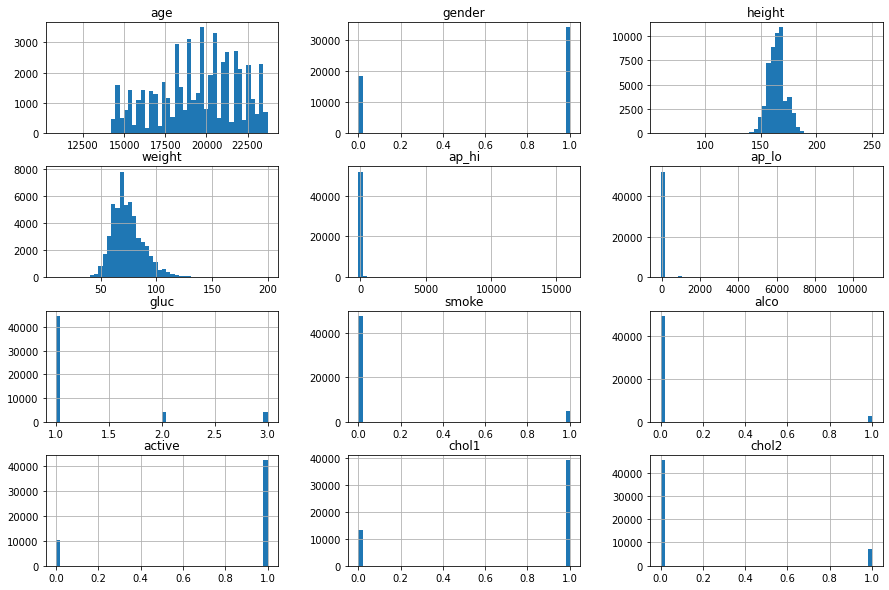

In [13]:
train_f.hist(bins=50, figsize=(15, 10))
plt.show()

## Getting Ready for Decision Trees

In [20]:
#For model evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#Actual Model
from sklearn.tree import DecisionTreeClassifier

In [21]:
#Training the model with the default parameters
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_f,train_t)

#KFold cross-validation for evaluating the model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(tree_clf, train_f, train_t, scoring='accuracy', cv=cv, n_jobs=-1)

# Reporting the performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.634 (0.006)


In [22]:
# How well can the default predict?
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      8671
           1       0.64      0.63      0.64      8829

    accuracy                           0.63     17500
   macro avg       0.63      0.63      0.63     17500
weighted avg       0.63      0.63      0.63     17500



In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
pipeline = Pipeline([('clf',tree_clf)])
parameters = {
    'clf__max_depth': np.linspace(1,10,10),
    'clf__min_samples_split': (1,2,3,4,5),
    'clf__min_samples_leaf': (1,2,3,4,5)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(train_f,train_t)

grid_search.best_score_

KeyboardInterrupt: ignored

In [ ]:
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f'{param_name} : {best_parameters[param_name]}')

In [ ]:
#Training the model with the optimised parameters
tree_clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2)
tree_clf.fit(train_f,train_t)

#KFold cross-validation for evaluating the model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(tree_clf, train_f, train_t, scoring='accuracy', cv=cv, n_jobs=-1)

# Reporting the performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# Ensemble Methods

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 

def plot_crossval_boxplot(models):
    outcome = []
    model_names = []

    for model_name, model in models:
        k_fold_validation = KFold(n_splits=10)
        results = cross_val_score(model, X_train, y_train, cv=k_fold_validation, scoring='accuracy')
        outcome.append(results)
        model_names.append(model_name)
        
    fig = plt.figure()
    fig.suptitle('Comparison of the Cross Validation Accuracy Scores')
    ax = fig.add_subplot(111)
    plt.boxplot(outcome)
    ax.set_xticklabels(model_names)
    plt.show()

## Bagging and Pasting Ensemble Methods

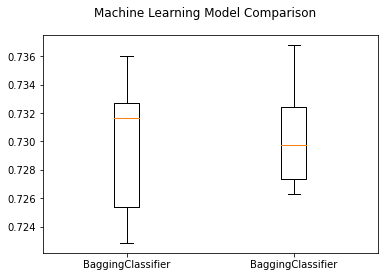

In [19]:
#Bagging
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500,
                            max_samples=100, 
                            bootstrap=True, 
                            n_jobs=-1)

#Pasting
pas_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500,
                            max_samples=100, 
                            bootstrap=False, 
                            n_jobs=-1)

bag_clf.fit(X_train, y_train)
pas_clf.fit(X_train, y_train)

plot_crossval_boxplot([('Classifier with Bagging',bag_clf), ('Classifier with Pasting',pas_clf)])

## Hard and Soft Voting in the Ensemble Method

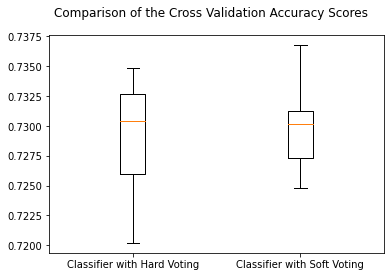

In [26]:
#Warning - takes 3 mins to compile
hard_voting_clf = VotingClassifier(estimators=[('bagging', bag_clf), ('pasting', pas_clf)],voting='hard')
soft_voting_clf = VotingClassifier(estimators=[('bagging', bag_clf), ('pasting', pas_clf)],voting='hard')

hard_voting_clf.fit(X_train_scaled, y_train)
soft_voting_clf.fit(X_train_scaled, y_train)

plot_crossval_boxplot([('Classifier with Hard Voting',hard_voting_clf), ('Classifier with Soft Voting',soft_voting_clf)])

## Random Forest Classifier (Similar to Bagging with Decision Tree Algorithm)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
#Training the model with the default parameters
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

#KFold cross-validation for evaluating the model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf_clf, train_f, train_t, scoring='accuracy', cv=cv, n_jobs=-1)

# Reporting the performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.713 (0.008)


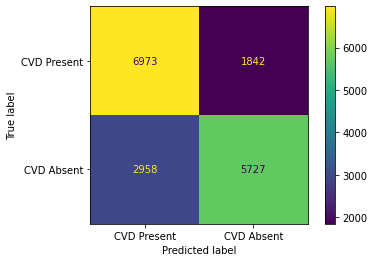

In [44]:
#How well can the default paramters predict?
y_pred = rf_clf.predict(X_test)
plot_confusion_matrix(rf_clf, X_test, y_test, display_labels = ['CVD Present','CVD Absent'])

In [35]:
# Warning takes 5 mins to compile
'''
pipeline = Pipeline([('clf',rf_clf)])
parameters = {
    'clf__max_depth': (1,2,3,4,5),
    'clf__min_samples_split': (1,2,3),
    'clf__min_samples_leaf': (1,2,3)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train,y_train)

grid_search.best_score_

Best score obtianed = 0.7297333333333335
'''

0.7297333333333335

In [36]:
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print(f'{param_name} : {best_parameters[param_name]}')
    
'''
Best Estimators obtained:
clf__max_depth : 5
clf__min_samples_leaf : 1
clf__min_samples_split : 2
'''

clf__max_depth : 5
clf__min_samples_leaf : 1
clf__min_samples_split : 2


In [40]:
#Training the model with the optimised parameters
rf_clf1 = RandomForestClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2)
rf_clf1.fit(X_train, y_train)

#KFold cross-validation for evaluating the model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf_clf1, train_f, train_t, scoring='accuracy', cv=cv, n_jobs=-1)

# Reporting the performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.729 (0.008)


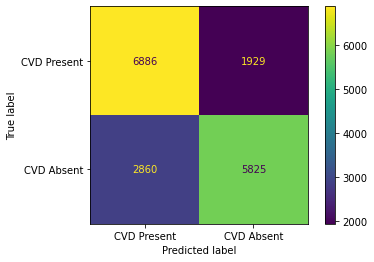

In [43]:
#How well can the default paramters predict?
y_pred = rf_clf1.predict(X_test)
plot_confusion_matrix(rf_clf1, X_test, y_test, display_labels = ['CVD Present','CVD Absent'])

## Comparison of Decision Boundary obtained in:
#### (i)  Decision Tree Classifier
#### (ii) Random Forest Classifier

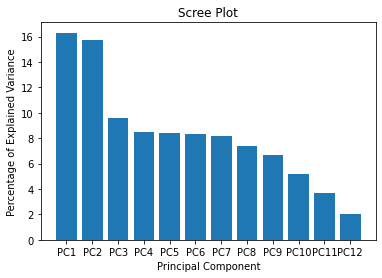

In [48]:
from sklearn.decomposition import PCA
import matplotlib.colors as colors

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

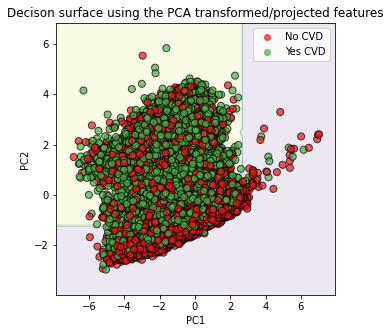

In [51]:
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]

rf_clf.fit(np.column_stack((pc1, pc2)), y_train)

x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = rf_clf.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.contourf(xx, yy, Z, alpha=0.1)


cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=50, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")

legend.get_texts()[0].set_text("No CVD")
legend.get_texts()[1].set_text("Yes CVD")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm.png')
plt.show()